# Term Project - Web Usage Mining
### Tung Lam Trinh - 300267601

### Goals:
- Analysis, predict and discover the groups of users (clusters) who have same web-behaviors and web-interests
- After that we would have a recommendation system which is able to give the recommendations to other users with the webpages that we get from users who are in a same cluster or nearest interests (nearest neighbors)

### The server-log dataset representing the stream of HTTP requests coming to a real e-commerce website in 1 day

- IpId: t the unique identifier of a Web client's IP address, composed of an integer and a two-letter code representing the country of origin to which the IP was allocated. Country codes are consistent with ISO 3166–1 Alpha-2 codes.

- UserId: identifier of the Web user.

- TimeStamp: long integer value specifying the UTC date and time of the arrival of a request, coded as the number of 100-nanosecond intervals that have elapsed since 00:00:00 UTC on 1st January, 1 A.D.

- HttpMethod: the HTTP method indicating the action to be performed for the target server resource (URI).

- Uri: is the string identifier (URI) of a target server resource. Some URIs were masked to protect sensitive data (see the section “Experimental design, materials, and methods” for details).

- HttpVersion: specifies the version of the HTTP protocol used by the client (HTTP/1.0 or HTTP/1.1).

- ResponseCode: is a numeric code for the HTTP response status indicating whether a given request is successfully processed by the server.

- Bytes: indicates the volume of data (in bytes) sent by the server in response to the client's request.

- Referrer: is the string identifier of the Web page that referred the client to the current Web object. Some referrers were partially camouflaged to protect sensitive data (see the section “Experimental design, materials, and methods” for details).

- UserAgent: is a string describing the client's software and usually contains the application type, operating system, software vendor, and software version.

In [21]:
# link download dataset "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/Z834IK"
# import libraries and database file
import pandas as pd
import numpy as np

data = pd.read_csv("eclog_1day.csv", encoding='utf8')

data.head()

,IpId,UserId,TimeStamp,HttpMethod,Uri,HttpVersion,ResponseCode,Bytes,Referrer,UserAgent
0,1PL,-,637116156000000000,POST,/inne/informacja_online.php,HTTP/1.1,200,0,https://shop.our-internet-company.pl/p-5315.html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:7...
1,1PL,-,637116156010000000,POST,/inne/informacja_online.php,HTTP/1.1,200,0,https://shop.our-internet-company.pl/p-10152.html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:7...
2,2NL,-,637116156010000000,GET,/wyszukiwanie-query1.html,HTTP/1.1,200,9018,-,Mozilla/5.0 (compatible; SemrushBot/6~bl; +htt...
3,3PL,-,637116156050000000,POST,/inne/informacja_online.php,HTTP/1.1,200,0,https://shop.our-internet-company.pl/p-3008.html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:7...
4,4PL,-,637116156050000000,POST,/inne/informacja_online.php,HTTP/1.1,200,0,https://shop.our-internet-company.pl/p-9153.html,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...


In [22]:
data.shape

(350683, 10)

In [23]:
# Extract 2 feature columns IpId and Uri
cols = ['IpId', 'Uri']

data_df = data[cols]

print("Shape:", data_df.shape)
data_df.head()

Shape: (350683, 2)


,IpId,Uri
0,1PL,/inne/informacja_online.php
1,1PL,/inne/informacja_online.php
2,2NL,/wyszukiwanie-query1.html
3,3PL,/inne/informacja_online.php
4,4PL,/inne/informacja_online.php


In [24]:
# drop rows if containing empty values
data_df = data_df.dropna()

data_df.shape

(350683, 2)

In [25]:
# counting the frequency of IpId and Uri in the dataset
x1 = data_df.groupby(['IpId', 'Uri']).size()
fre_data_df = x1.reset_index(name='count')

print("Shape:", fre_data_df.shape)
fre_data_df.head()

# there are 260493 page times the website visited by users

Shape: (260493, 3)


,IpId,Uri,count
0,1000US,/p-2100.html,1
1,1001PL,/favicon.ico,1
2,1001PL,/images/1_4_2_luty/mini/100px_image171.jpg,1
3,1001PL,/images/2_styczen/mini/250px_image179.jpg,1
4,1001PL,/images/image27.gif,1


In [26]:
# top 5 users visited conresponding page Uri
# "/inne/informacja_online.php" is the most page visited by users

fre_data_df.sort_values('count', ascending=False).head(10)

,IpId,Uri,count
18166,1280PL,/inne/informacja_online.php,2244
86269,2311PL,/inne/informacja_online.php,2232
195213,4015PL,/inne/informacja_online.php,1830
224171,564PL,/inne/informacja_online.php,1770
43644,158PL,/inne/informacja_online.php,1766
255730,950PL,/inne/informacja_online.php,1422
96973,24PL,/inne/informacja_online.php,1401
139293,31PL,/inne/informacja_online.php,1307
193360,3PL,/inne/informacja_online.php,1303
106951,262PL,/inne/informacja_online.php,1219


In [27]:
fre_data_df['IpId'].value_counts()

# there are 4297 unique users

599PL     2716
2306PL    2509
950PL     2394
3560PL    2227
268PL     1940
          ... 
3234PL       1
3262DE       1
2259PL       1
1733PL       1
2406PL       1
Name: IpId, Length: 4297, dtype: int64

In [28]:
fre_data_df['Uri'].value_counts()

# there are 41920 unique Uri(s) and we also could see the top Uri(s)

/javascript/skrypty.php                                1863
/inne/informacja_online.php                            1746
/javascript/jquery.js                                  1716
/images/naglowki/image5.jpg                            1703
/szablony/shop_3.rwd/obrazki/szablon/rwd_szukaj.png    1658
                                                       ... 
/wyszukiwanie-query1232.html                              1
/images/grudzien1_1/mini/40px_image1507.jpg               1
/images/1_4_kwiecien/mini/250px_image7670.JPG             1
/inne/zmiana_platnosci.php?tok=ytw86589h1                 1
/wyszukiwanie-query835.html                               1
Name: Uri, Length: 41920, dtype: int64

In [43]:
# convert frequency dataset fre_data_df to Pivot table (multi-dimension vectors by user IpId)

pivot_df = fre_data_df.pivot(
    index='IpId',
    columns='Uri',
    values='count'
).fillna(0)

pivot_df.head()

Uri,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43115&zakladka=1&akcja=etykieta&przesylka=655010556905500015498877,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr
IpId,,,,,,,,,,,,,,,,,,,,,
1000US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003US,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 17354 characters

In [10]:
pivot_df.describe()

Uri,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43115&zakladka=1&akcja=etykieta&przesylka=655010556905500015498877,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr
count,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,...,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000
mean,0.069583,0.000465,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,...,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000465,0.001396
std,0.407733,0.030510,0.015255,0.015255,0.015255,0.015255,0.015255,0.015255,0.015255,0.015255,...,0.015255,0.015255,0.015255,0.015255,0.015255,0.015255,0.015255,0.015255,0.030510,0.043131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


limit_output extension: Maximum message size of 10000 exceeded with 22201 characters

In [11]:
###########################################

# Data Models

## KMean Clusters

In [42]:
# create a copy of pivot_df

kmean_pivot_df = pivot_df
kmean_pivot_df.head()

Uri,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr,Clusters
IpId,,,,,,,,,,,,,,,,,,,,,
1000US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1001PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1002PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1003US,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1004PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


limit_output extension: Maximum message size of 10000 exceeded with 16493 characters

Text(0, 0.5, 'SSE')

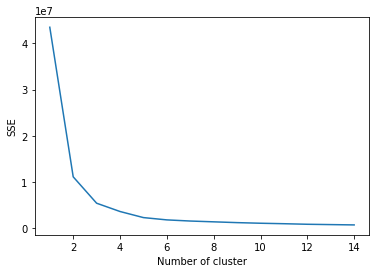

In [185]:
import matplotlib.pyplot as plt

sse = {}
# Looping over multiple values of k from 1 to 15
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k).fit(kmean_pivot_df)
    sse[k] = kmeans.inertia_
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

In [34]:
# as we could see in the graph, the SSE (Sum of Squared Error) significantly decreases from k=1 to k=6
# and SSE remains constantly after k=6
# therefore, k=6 (6 clusters) is probably the best fit for our model

from sklearn.cluster import KMeans

kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(kmean_pivot_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
# creating a 'Clusters' column in kmean_pivot_df for storing the cluster values
# each user (IpId) is conresponding to a cluster

kmean_pivot_df['Clusters'] = kmeanModel.labels_
kmean_pivot_df['Clusters']

IpId
1000US    0
1001PL    5
1002PL    0
1003US    0
1004PL    0
         ..
997PL     5
998PL     0
999PL     0
99PL      0
9PL       0
Name: Clusters, Length: 4297, dtype: int32

In [17]:
kmean_pivot_df.head(2)

Uri,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr,Clusters
IpId,,,,,,,,,,,,,,,,,,,,,
1000US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1001PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [15]:
# the numbers of users conresponding to each cluster (6 clusters)

kmean_pivot_df['Clusters'].value_counts()

0    4161
5      81
3      27
2      15
1       8
4       5
Name: Clusters, dtype: int64

In [40]:
kmean_clusters = pd.DataFrame(kmean_pivot_df['Clusters'].reset_index())
kmean_clusters

,IpId,Clusters
0,1000US,0
1,1001PL,5
2,1002PL,0
3,1003US,0
4,1004PL,0
...,...,...
4292,997PL,5
4293,998PL,0
4294,999PL,0
4295,99PL,0


In [46]:
##############

## K Nearest Neighbor

In [50]:
# create a copy of pivot_df

knn_pivot_df = pivot_df
knn_pivot_df.head()

Uri,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43115&zakladka=1&akcja=etykieta&przesylka=655010556905500015498877,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr
IpId,,,,,,,,,,,,,,,,,,,,,
1000US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003US,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 17354 characters

In [52]:
# convert the index IpId of dataframe to the IpId column

knn_pivot_df1 = knn_pivot_df.rename_axis(None, axis=1).reset_index()

knn_pivot_df1.head()

,IpId,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43115&zakladka=1&akcja=etykieta&przesylka=655010556905500015498877,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr
0,1000US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003US,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 14016 characters

In [54]:
# drop IpId column before apply the MinMaxScaler for dataframe

knn_pivot_df2 = knn_pivot_df1.drop('IpId', axis=1)

knn_pivot_df2.head()

,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43115&zakladka=1&akcja=etykieta&przesylka=655010556905500015498877,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 14311 characters

In [55]:
# apply MinMaxScaler for knn_pivot_df2 dataframe

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y = scaler.fit_transform(knn_pivot_df2)
knn_pivot_df3 = pd.DataFrame(y)

knn_pivot_df3.columns = knn_pivot_df2.columns
knn_pivot_df3.head()

,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43115&zakladka=1&akcja=etykieta&przesylka=655010556905500015498877,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 14311 characters

In [56]:
knn_pivot_df3.shape

(4297, 41920)

In [57]:
# add IpId column to scaled dataframe

knn_pivot_df3['IpId'] = knn_pivot_df1['IpId']
knn_pivot_df3.head()

,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr,IpId
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000US
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1001PL
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1002PL
3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1003US
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1004PL


limit_output extension: Maximum message size of 10000 exceeded with 13530 characters

In [58]:
# convert back to pivot table format by setting IpId column as the index

knn_pivot_df_final = knn_pivot_df3.set_index('IpId')

knn_pivot_df_final.head()

,/,//admin/config.php?password%5B0%5D=ZIZO&username=admin,/?cPath=21&sort=2a&action=buy_now&products_id=70,/?cPath=21&sort=2a&action=buy_now&products_id=767,/?cPath=21&sort=4a&action=buy_now&products_id=1124,/?cPath=21&sort=4a&action=buy_now&products_id=1158,/?cPath=21&sort=4a&action=buy_now&products_id=1161,/?cPath=21&sort=4a&action=buy_now&products_id=117,/?cPath=21&sort=4a&action=buy_now&products_id=1615,/?cPath=21&sort=4a&action=buy_now&products_id=2017,...,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43115&zakladka=1&akcja=etykieta&przesylka=655010556905500015498877,/zarzadzanie/sprzedaz/zamowienia_wysylka_inpost_akcja.php?id_poz=43116&zakladka=1&akcja=etykieta&przesylka=655010556941813026385043,/zarzadzanie/sprzedaz/zamowienia_zamowienie_pdf.php?id_poz=42730,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43027,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43084,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43087,/zarzadzanie/sprzedaz/zamowienia_zaplacone.php?id_poz=43097,:\x92T\x05ib\xE8\x0Ek_V\x08\xDD=x\xAB\xC2\x13\x22\xB88\x1B\x01\x07\xA6\xB1~\xE0Ap\x8D\x96\xF3 \xB9\xDB\x0CEN#5h[\xE4\xC5\x16\xF7wBr=\xB1,\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie: mstshash=Administr
IpId,,,,,,,,,,,,,,,,,,,,,
1000US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003US,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


limit_output extension: Maximum message size of 10000 exceeded with 17354 characters

In [61]:
print("knn_pivot_df:", knn_pivot_df.shape)
print("knn_pivot_df_final:", knn_pivot_df_final.shape)

knn_pivot_df: (4297, 41920)
knn_pivot_df_final: (4297, 41920)


In [62]:
# Running K Nearest Neighbors with the number of neighbors are 20

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=20, n_jobs=-1)

model_knn.fit(knn_pivot_df_final)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [64]:
# calculating distances and userIds array of 20 nearest neighbors

distances, userIds = model_knn.kneighbors(knn_pivot_df_final)

In [65]:
# array of distances
distances

array([[0.00000000e+00, 9.62144498e-01, 9.66264962e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.44328993e-15, 8.02181627e-01, 8.58111018e-01, ...,
        9.05266258e-01, 9.07464968e-01, 9.09335683e-01],
       [0.00000000e+00, 8.90053404e-01, 8.95043318e-01, ...,
        9.34489057e-01, 9.35436650e-01, 9.36784136e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 5.74135055e-01, 5.87638098e-01, ...,
        9.28486424e-01, 9.29129424e-01, 9.29793429e-01],
       [2.22044605e-16, 9.82041922e-01, 9.82041922e-01, ...,
        9.92221367e-01, 9.92221367e-01, 9.92221367e-01]])

In [68]:
# array of userIds (IpId)
# this is a arrays list of all users that each array in the list is 20 nearest neighbors for each user 
# first element of each array is user index
userIds

array([[   0, 3220, 1531, ..., 2873, 2871, 2883],
       [   1,  694,   81, ..., 2342,  176, 1329],
       [   2, 3640, 2387, ...,  826,  903, 1085],
       ...,
       [4294, 4265, 3426, ..., 2870, 2861, 2855],
       [4295, 1150, 1938, ...,  808, 4277, 1748],
       [4296,  305, 1546, ..., 3909, 3918, 2220]], dtype=int64)

In [71]:
# create a users dataframe that has IpId mapping to user index

users_df = pd.DataFrame(knn_pivot_df3['IpId'])

In [73]:
users_df.head()

,IpId
0,1000US
1,1001PL
2,1002PL
3,1003US
4,1004PL


In [84]:
# create a arrays list of neighbors for each user

parentArr = []

for x in userIds:
    childArr = []
    for y in x:
        childArr.append(users_df['IpId'].loc[[y]].values[0])
    parentArr.append(childArr)


In [ ]:
# print(parentArr)

In [100]:
# create a 19 neighbors dataframe for users (the first element is userId itself)
neighbors_user_df = pd.DataFrame(parentArr)

# rename columns
cols = {
    0:'IpId', 
    1:'neighbor1', 2:'neighbor2', 3:'neighbor3', 4:'neighbor4', 5:'neighbor5', 6:'neighbor6', 7:'neighbor7',
    8:'neighbor8', 9:'neighbor9', 10:'neighbor10', 11:'neighbor11', 12:'neighbor12', 13:'neighbor13', 
    14:'neighbor14', 15:'neighbor15', 16:'neighbor16', 17:'neighbor17', 18:'neighbor18', 19:'neighbor19'
}
neighbors_user_df.rename(columns=cols, inplace=True)

In [101]:
neighbors_user_df.head()

,IpId,neighbor1,neighbor2,neighbor3,neighbor4,neighbor5,neighbor6,neighbor7,neighbor8,neighbor9,neighbor10,neighbor11,neighbor12,neighbor13,neighbor14,neighbor15,neighbor16,neighbor17,neighbor18,neighbor19
0,1000US,38US,237US,3585PL,3572PL,3584PL,3583PL,3582PL,3581IE,3580US,357PL,3579PL,3578PL,3577US,3576PL,3575PL,3574PL,3588PL,3586PL,3597PL
1,1001PL,1626PL,1074PL,1928PL,3546PL,3367PL,1788PL,3622PL,1957PL,3903PL,607PL,4003PL,753PL,344PL,2461PL,3805PL,3067PL,3109PL,115US,2198PL
2,1002PL,4278PL,314US,2461PL,1027PL,440PL,3551PL,3146PL,3679PL,3284PL,1776PL,724PL,4251PL,3095PL,3722PL,1586PL,2654PL,1745GB,1814PL,1979PL
3,253DE,392CZ,1003US,2363US,580US,1379CN,3691FR,3675US,230FR,3627US,4091FR,247US,271US,275DE,1057US,366US,183US,1903US,953US,4115US
4,1004PL,2243PL,1668US,3586PL,3573PL,3585PL,3584PL,3583PL,3582PL,3581IE,357PL,3587PL,3579PL,3578PL,3577US,3576PL,3575PL,3574PL,3580US,359US


In [102]:
neighbors_user_df.shape

(4297, 20)

In [110]:
###########################################################

# Web usage mining analysis

In [103]:
data.head()

,IpId,UserId,TimeStamp,HttpMethod,Uri,HttpVersion,ResponseCode,Bytes,Referrer,UserAgent
0,1PL,-,637116156000000000,POST,/inne/informacja_online.php,HTTP/1.1,200,0,https://shop.our-internet-company.pl/p-5315.html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:7...
1,1PL,-,637116156010000000,POST,/inne/informacja_online.php,HTTP/1.1,200,0,https://shop.our-internet-company.pl/p-10152.html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:7...
2,2NL,-,637116156010000000,GET,/wyszukiwanie-query1.html,HTTP/1.1,200,9018,-,Mozilla/5.0 (compatible; SemrushBot/6~bl; +htt...
3,3PL,-,637116156050000000,POST,/inne/informacja_online.php,HTTP/1.1,200,0,https://shop.our-internet-company.pl/p-3008.html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:7...
4,4PL,-,637116156050000000,POST,/inne/informacja_online.php,HTTP/1.1,200,0,https://shop.our-internet-company.pl/p-9153.html,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...


### Display the frequency of each ResponseCode

In [106]:
fre_response_code = data.groupby(['ResponseCode']).size().reset_index(name='count')
fre_response_code

,ResponseCode,count
0,200,338043
1,206,150
2,301,3387
3,302,1471
4,304,6847
5,400,11
6,403,72
7,404,307
8,408,7
9,499,388


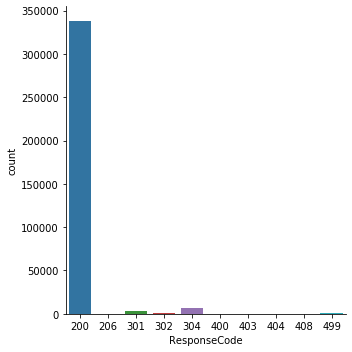

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.catplot(x='ResponseCode', y='count', data=fre_response_code,
            kind='bar', order=fre_response_code['ResponseCode'])

### Display the top 20 most frequent endpoints

In [115]:
fre_uri = data.groupby(['Uri']).size().sort_values(ascending=False).reset_index(name='count').head(20)
fre_uri

,Uri,count
0,/inne/informacja_online.php,53773
1,/javascript/skrypty.php,8417
2,/javascript/produkt.php,3784
3,/szablony/shop_11.rwd/css/style.php?ncss=style...,3314
4,/szablony/shop_11.rwd/css/style.php?ncss=style...,2907
5,/favicon.ico,2061
6,/javascript/jquery.js,1965
7,/images/naglowki/image5.jpg,1910
8,/szablony/shop_3.rwd/obrazki/szablon/rwd_szuka...,1866
9,/szablony/shop_3.rwd/obrazki/szablon/rwd_schow...,1851


### Display the top 10 error endpoints

In [118]:
fre_err_uri = data[data['ResponseCode'] != 200].groupby(['Uri']).size().sort_values(ascending=False).reset_index(name='count').head(20)
fre_err_uri

,Uri,count
0,/szukaj.html,157
1,/javascript/jquery.js,108
2,/szablony/shop_11.rwd/obrazki/podziel_ikony/po...,107
3,/images/naglowki/image5.jpg,93
4,/szablony/shop_11.rwd/obrazki/szablon/tlo_menu...,90
5,/szablony/shop_11.rwd/obrazki/szablon/tlo_menu...,89
6,/szablony/shop_11.rwd/obrazki/szablon/separato...,89
7,/images/mini/250px_image1235.jpg,89
8,/zarzadzanie/produkty/produkty_akcja.php,89
9,/szablony/shop_11.rwd/obrazki/szablon/stopka_i...,87
